## Imports

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## 1. Função Gaussiana (RBF)
A função de ativação RBF utiliza a função Gaussiana para calcular a ativação dos neurônios. Essa função é essencial para determinar a influência de cada neurônio em relação aos dados de entrada.

In [31]:
def gaussian_rbf(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c, axis=1)**2 / (2 * sigma**2))

## 2. Classe RBFNetwork
A classe RBFNetwork é projetada para encapsular a lógica da rede de base radial. A função `fit` ajusta os centros dos neurônios usando KMeans, enquanto a função `predict` é responsável por gerar as previsões com base nos dados de entrada. O uso de KMeans permite a determinação eficiente dos centros.

In [50]:
class RBFNetwork:
    def __init__(self, num_centers, sigma=1.0):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def fit(self, X, y):
        # Ajustar os centros usando KMeans
        kmeans = KMeans(n_clusters=self.num_centers, random_state=42).fit(X)
        self.centers = kmeans.cluster_centers_

        # Calcular a matriz RBF - (ativação dos neurônios)
        RBF_matrix = np.array([gaussian_rbf(x, self.centers, self.sigma) for x in X])

        # Ajustar os pesos da camada de saída usando a pseudoinversa
        self.weights = np.linalg.pinv(RBF_matrix).dot(y)

    def predict(self, X):
        # Calcular a matriz RBF
        RBF_matrix = np.array([gaussian_rbf(x, self.centers, self.sigma) for x in X])
        # Calcular a saída (predição)
        return RBF_matrix.dot(self.weights)

## 3. Geraração de dados com (moons) com ruído controlado
A geração de dados com `make_moons` cria um conjunto de dados desafiador para classificação, introduzindo uma separação não-linear que simula problemas do mundo real.

In [51]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

## 3.1 Dividir o conjunto em treino e teste (80% treino, 20% teste)
A divisão entre treino e teste organiza os dados em conjuntos distintos para treinamento e avaliação. O parâmetro `random_state` é utilizado para garantir a reprodutibilidade dos resultados, permitindo que os mesmos dados sejam usados em execuções futuras.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## 3.2 Escalonar os dados para uma melhor performance (normalização)
A normalização dos dados com `StandardScaler` é uma prática recomendada, pois ajusta a escala dos dados, permitindo que a rede neural funcione de maneira mais eficaz. Isso ajuda a evitar problemas relacionados a diferentes escalas nas features.

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Instanciar a rede RBF com 10 centros e sigma 1.0 e Treinar a rede nos dados de treino
A rede RBF é instanciada com um número específico de centros e um desvio padrão, preparando-a para ser treinada. O treinamento ocorre nos dados de treino, onde os pesos são ajustados para minimizar o erro nas previsões.

In [54]:
rbf_net = RBFNetwork(num_centers=10, sigma=1.0)
rbf_net.fit(X_train, y_train)

## 5. Predições
A lógica para calcular as predições transforma os resultados em classes binárias (0 ou 1). Isso é fundamental para avaliar a performance do modelo em tarefas de classificação.

In [55]:
y_pred = rbf_net.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

## 6. Cálculo da Acurácia
O cálculo da acurácia, realizado com `accuracy_score`, fornece uma medida quantitativa de quão bem o modelo se saiu no conjunto de teste. Isso é essencial para entender o desempenho do modelo.


In [56]:
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Acurácia no conjunto de teste: {accuracy * 100:.2f}%")

Acurácia no conjunto de teste: 99.00%


## 7. Visualização
Os gráficos gerados apresentam uma visualização clara dos dados de treino, teste e os centros RBF, facilitando a compreensão de como a rede está se comportando em relação aos dados. Essa visualização é crucial para a interpretação dos resultados.

### 7.1 Plotar os dados de treino e os centros das RBFs

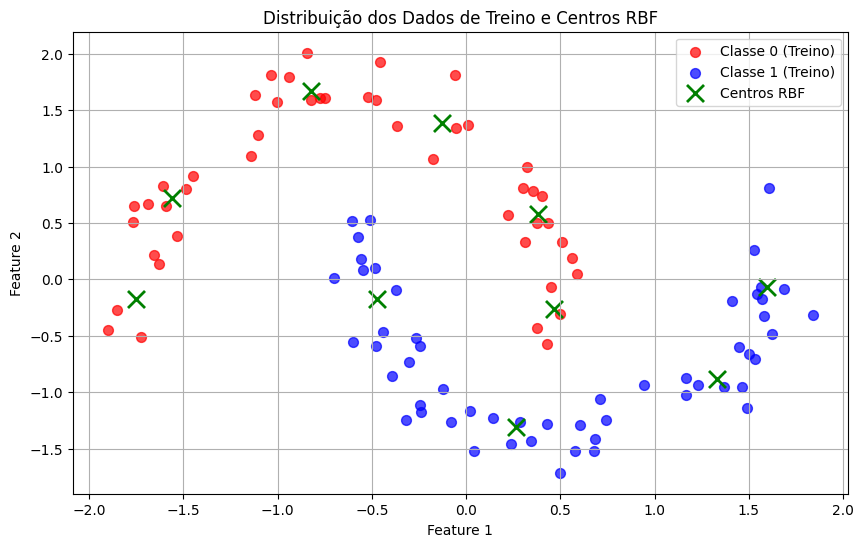

In [57]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar os dados de treino
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0 (Treino)', s=50, alpha=0.7)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Classe 1 (Treino)', s=50, alpha=0.7)

# Plotar os centros RBF
plt.scatter(rbf_net.centers[:, 0], rbf_net.centers[:, 1], color='green', marker='x', s=150, label='Centros RBF', linewidth=2)

# Adicionando legendas, título e rótulos dos eixos
plt.legend()
plt.title('Distribuição dos Dados de Treino e Centros RBF')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Mostrar o gráfico
plt.grid()
plt.show()

### 7.2 Plotar os dados de teste com as previsões

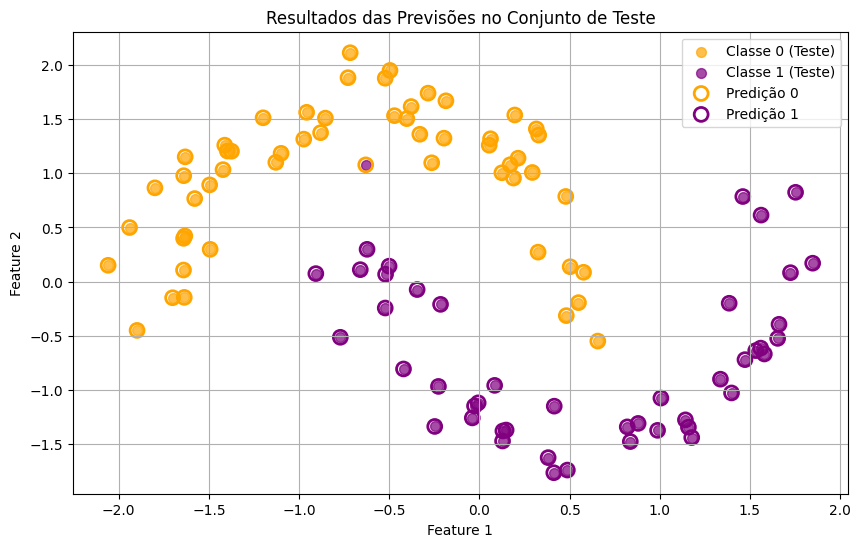

In [58]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar os dados de teste
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='orange', label='Classe 0 (Teste)', s=50, alpha=0.7)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='purple', label='Classe 1 (Teste)', s=50, alpha=0.7)

# Plotar as predições
plt.scatter(X_test[y_pred_class == 0][:, 0], X_test[y_pred_class == 0][:, 1], facecolors='none', edgecolors='orange', label='Predição 0', s=100, linewidth=2)
plt.scatter(X_test[y_pred_class == 1][:, 0], X_test[y_pred_class == 1][:, 1], facecolors='none', edgecolors='purple', label='Predição 1', s=100, linewidth=2)

# Adicionando legendas e título
plt.legend()
plt.title('Resultados das Previsões no Conjunto de Teste')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Mostrar o gráfico
plt.grid()
plt.show()